# TEST Fast5Tools package

## Imports

In [1]:
# pycl imports
from pycl.pycl import head, tail, cat, linerange, fastcount, dir_walk, mkdir, hide_traceback, larger_display, jprint
from pycl.pycl import jhelp as help
import numpy as np
import pandas as pd
import shelve
import itertools
from pprint import pprint as pp

# Matplotlib imports
from matplotlib import pyplot as pl
%matplotlib inline
pl.rcParams['figure.figsize'] = 40, 5
pl.rcParams['font.family'] = 'sans-serif'
pl.rcParams['font.sans-serif'] = ['DejaVu Sans']
pl.style.use('ggplot')
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 200

# Jupyter tweaking
#hide_traceback()
larger_display(100)

from Fast5Tools.Fast5 import Fast5, Fast5Error
from Fast5Tools.Fast5Parser import Fast5Parser

# Test Fast5

## Fast5 init

In [2]:
help (Fast5.__init__, full=True)

Parse a Fast5 file basecalled by albacore 2.0+ with h5py and extract the datasets raw, events and fastq.

The sequence and quality are extracted from the fastq and the event array is collapsed per contiguous kmers

* fast5_fn: STR

Path to a fast5 file basecalled by albacore 2.0+

* analyses_group: STR (default Basecall_1D_000)

Name of the basecall analyses group in the fast5 file. If None the no basecall values will be fetched

* raw_read_num: INT (default 0)

Index of the raw read values in the raw group in the fast5 file. If None the no raw values will be fetched

In [13]:
f = Fast5 (fast5_fn="./data/0/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_10_ch_109_strand.fast5")
print (f)

[Fast5] file:./data/0/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_10_ch_109_strand.fast5
	Read ID: 90480faf-a431-4fa6-8d95-435fc04b0388
	Count Raw signals: 27570



In [14]:
f = Fast5 (fast5_fn="./data/1/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_5_ch_189_strand.fast5"
print (f)

[Fast5] file:./data/1/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_5_ch_189_strand.fast5
	Read ID: 31192971-25e5-4cbc-8342-62c2a1dba854
	Count Raw signals: 22631
	[Basecall] Albacore_basecalling
		Sequence: ACUUCAGCCGCAGAAGCGAGAUAGG
		Quality: [ 2  3  3  3  4  2  8 15 20  9  9  9  7  7  8  8  6  7  6  7  7  6  4  7 11]
		Sequence length: 401	Empty kmers: 87	Mean quality: 8.920987654320987



In [15]:
f = Fast5 (fast5_fn="./data/0/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_10_ch_109_strand.fast5", error_on_missing_basecall=True)
print (f)

Fast5Error: No Basecall Value

## Test Properties

In [24]:
f = Fast5 (fast5_fn="./data/1/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_5_ch_189_strand.fast5")
print(f.n_raw)
print(f.sequencing_kit)
print(f.flowcell_type)

22631
SQK-RNA001
FLO-MIN106


In [25]:
f = Fast5 (fast5_fn="./data/1/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_5_ch_189_strand.fast5")
pp(f.metadata)

OrderedDict([('context_tags',
              OrderedDict([('experiment_duration_set', '2880'),
                           ('experiment_type', 'rna'),
                           ('fast5_output_fastq_in_hdf', '1'),
                           ('fast5_raw', '1'),
                           ('fast5_reads_per_folder', '2000'),
                           ('fastq_enabled', '0'),
                           ('fastq_reads_per_file', '4000'),
                           ('filename',
                            'nanopore_optiplex_7040_20180522_fah20140_mn24205_sequencing_run_69_99934'),
                           ('flowcell_type', 'flo-min106'),
                           ('kit_classification', 'none'),
                           ('local_basecalling', '0'),
                           ('local_bc_comp_model', ''),
                           ('local_bc_temp_model',
                            'template_r9.4_70bps_5mer_rna_raw.jsn'),
                           ('sample_frequency', '3012'),
              

## Test plot_raw

In [4]:
help (Fast5.plot_raw, full=True)

Plot raw signal and kmers boundaries

* start INT

If defined the raw plot will start at that value

* end INT

If defined the raw plot will end at that value

* plot_basecall BOOL

If True the start and end position of each kmer will be indicated by vertical lines on the graph

* smoothing_win_size INT

If larger than 0 will smooth the signal with a moving median window of size X

* zscore_norm: BOOL (default False)

If True the raw will be normalized using the zscore formula

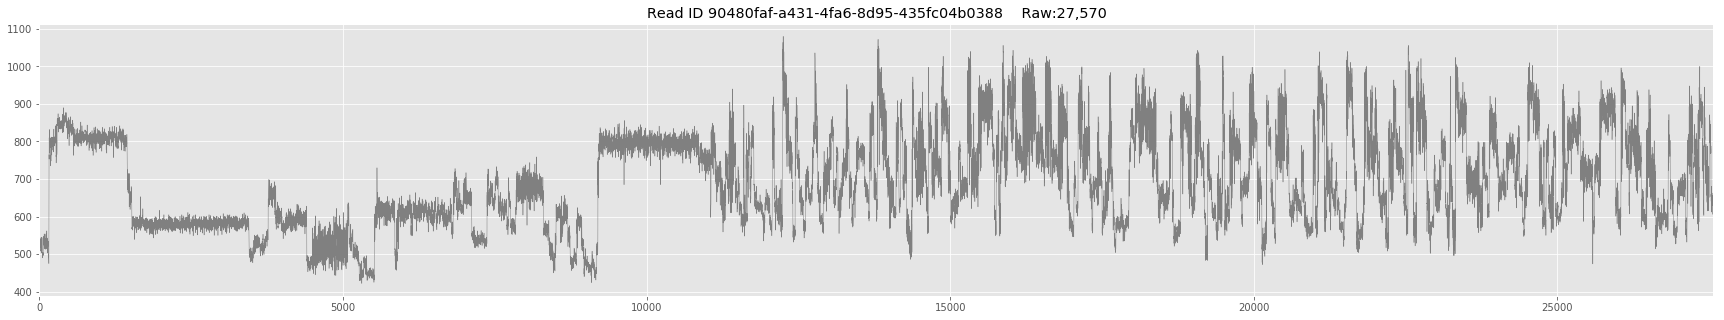

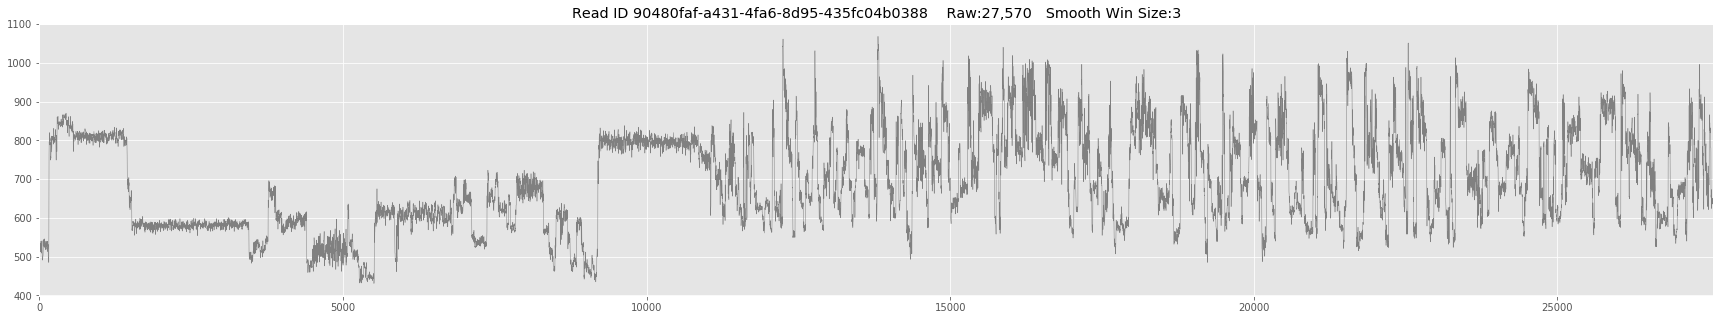

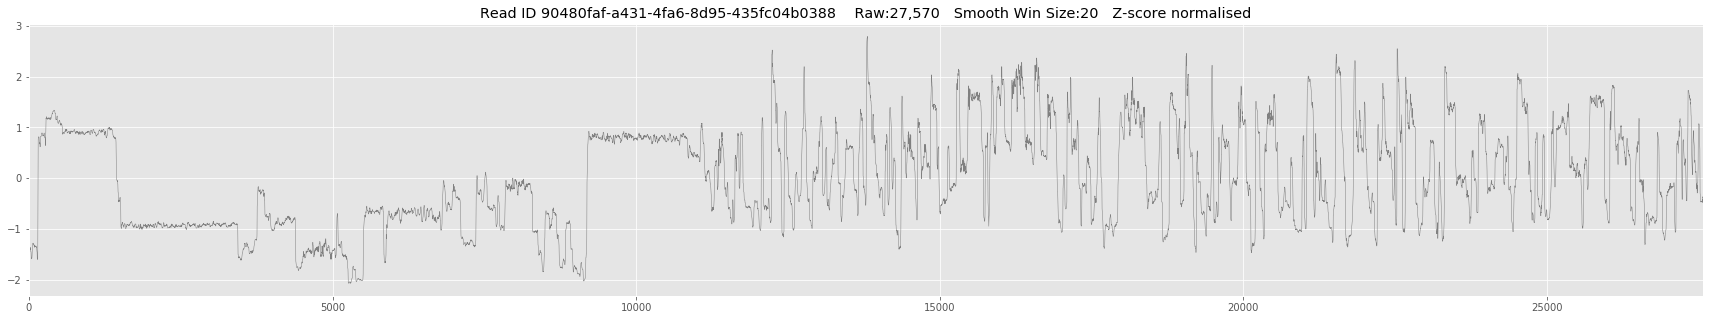

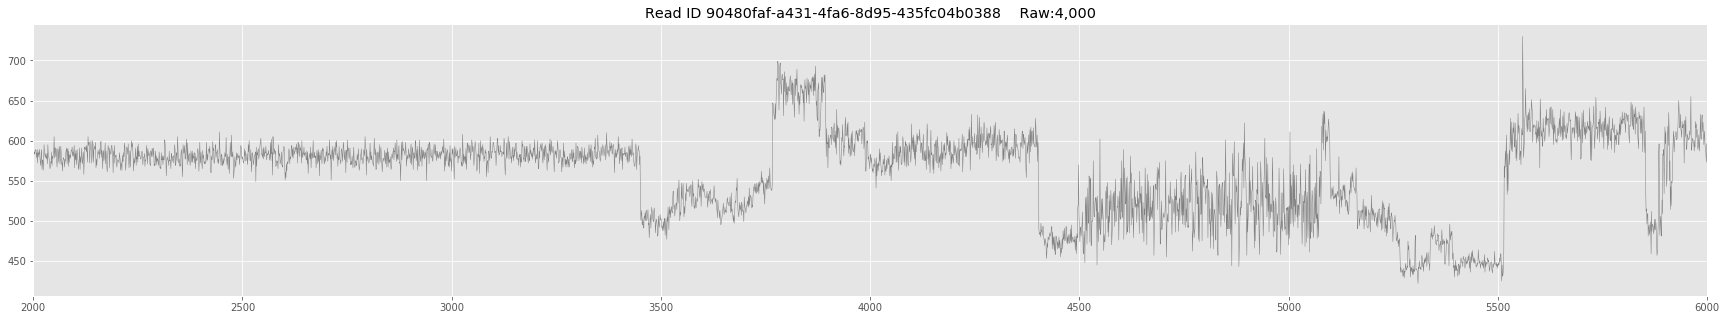

In [6]:
f = Fast5 (fast5_fn="./data/0/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_10_ch_109_strand.fast5")
fig, ax = f.plot_raw ()
fig, ax = f.plot_raw (smoothing_win_size=3)
fig, ax = f.plot_raw (smoothing_win_size=20, zscore_norm=True)
fig, ax = f.plot_raw (start = 2000, end = 6000)

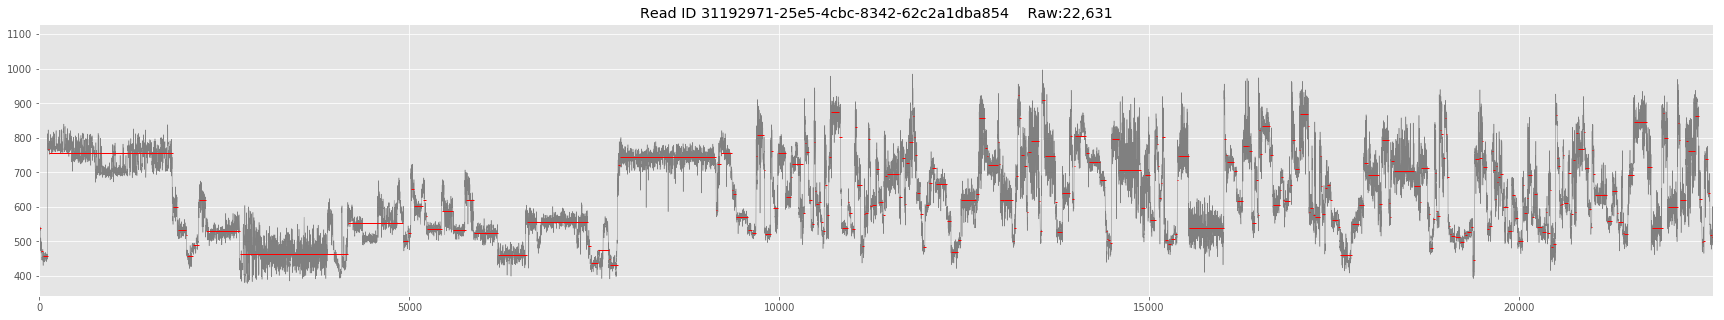

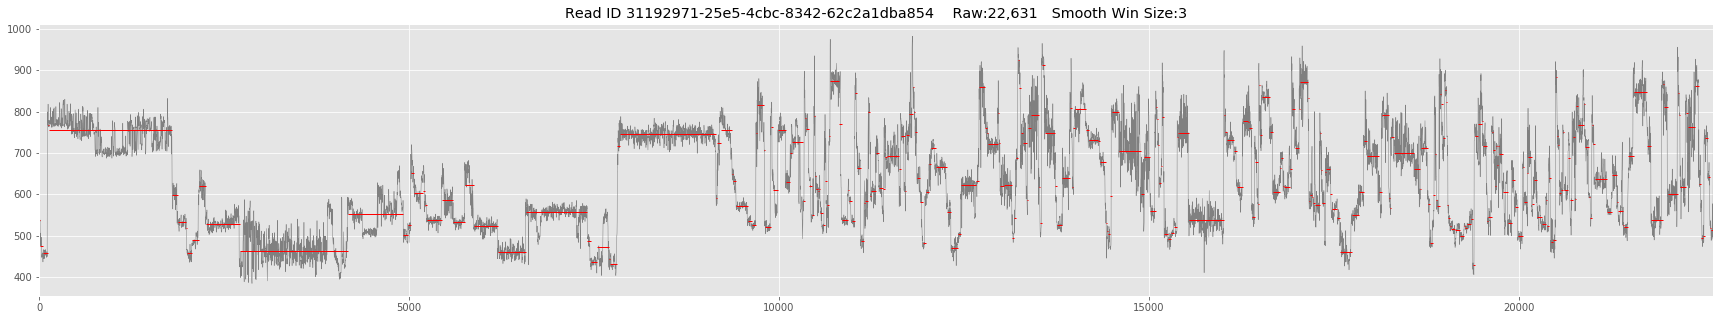

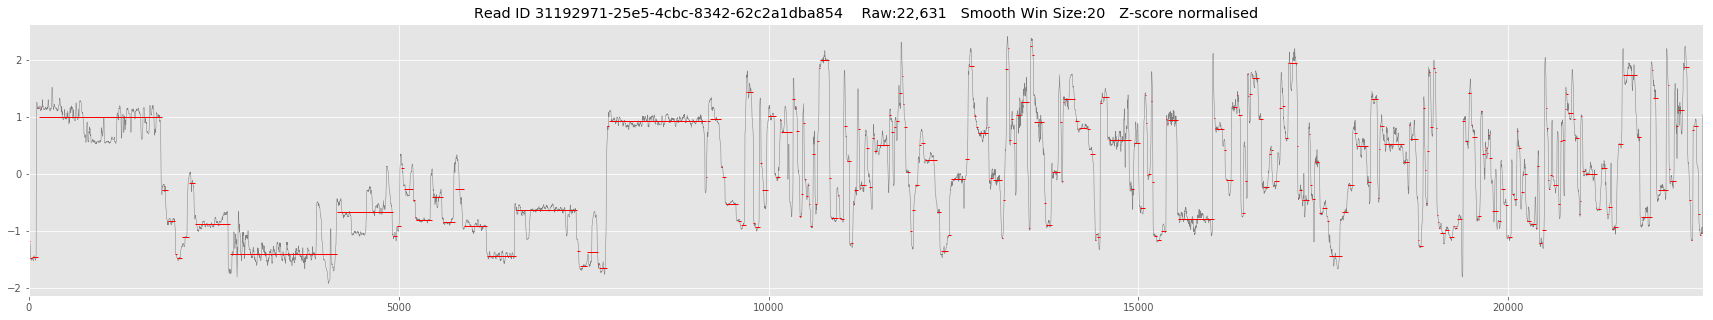

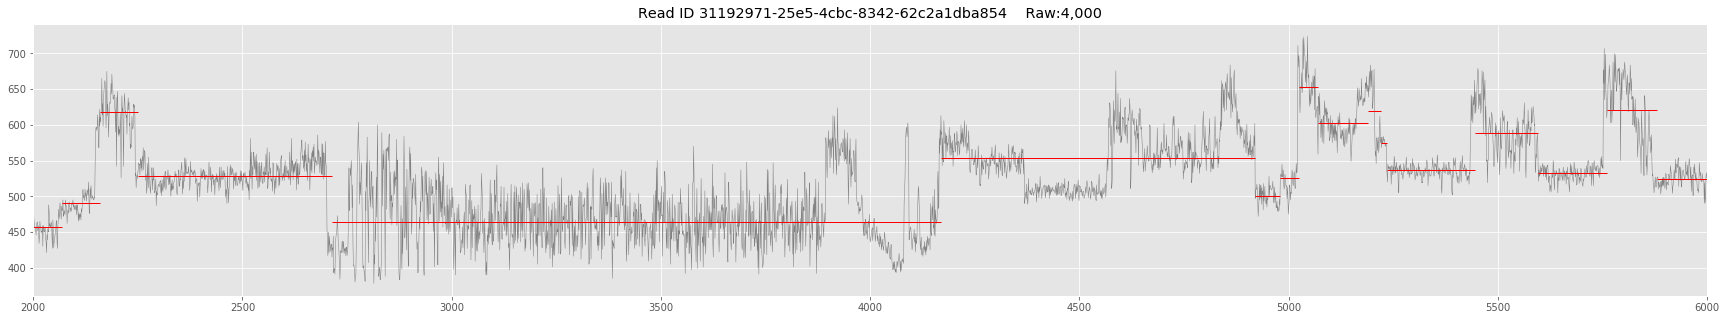

In [4]:
f = Fast5 (fast5_fn="./data/1/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_5_ch_189_strand.fast5")
fig, ax = f.plot_raw ()
fig, ax = f.plot_raw (smoothing_win_size=3)
fig, ax = f.plot_raw (smoothing_win_size=20, zscore_norm=True)
fig, ax = f.plot_raw (start = 2000, end = 6000)

## Test get_raw

In [26]:
help(Fast5.get_raw, full=True)

* start INT

If defined the data will start at that value

* end INT

If defined the data will end at that value

* smoothing_win_size INT

If larger than 0 will smooth the signal with a moving median window of size X

* zscore_norm: BOOL (default False)

If True the raw will be normalized using the zscore formula

In [31]:
f = Fast5 (fast5_fn="./data/1/nanopore_OptiPlex_7040_20180522_FAH20140_MN24205_sequencing_run_69_99934_read_5_ch_189_strand.fast5")
%time display (f.get_raw ())
%time display (f.get_raw (zscore_norm=True))
%time display (f.get_raw (smoothing_win_size=5))
%time display (f.get_raw (start=2000, smoothing_win_size=5))
%time display (f.get_raw (start=2000, end= 2005, smoothing_win_size=5))

array([1094,  535,  541, ...,  532,  566,  759], dtype=int16)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 1.93 ms


array([ 3.82038882, -0.81566057, -0.76589976, ..., -0.84054098,
       -0.55856302,  1.04207657])

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 2.31 ms


array([ 546. ,  546. ,  546. , ...,  566. ,  662.5,  759. ])

CPU times: user 480 ms, sys: 4 ms, total: 484 ms
Wall time: 495 ms


array([ 464. ,  457. ,  457. , ...,  566. ,  662.5,  759. ])

CPU times: user 468 ms, sys: 0 ns, total: 468 ms
Wall time: 473 ms


array([ 464.,  457.,  457.,  457.,  457.])

CPU times: user 464 ms, sys: 0 ns, total: 464 ms
Wall time: 476 ms


# Test Helper_fun

## Test find_fast5_file_gen

In [3]:
help (find_fast5_files_gen, full=True)

NameError: name 'find_fast5_files_gen' is not defined

In [40]:
for i in find_fast5_files_gen ("./dist/"):
    print(i, line_height=1)

In [39]:
for i in find_fast5_files_gen ("./data/"):
    print(i, line_height=1)

## Test find_fast5_file_list

In [34]:
help (find_fast5_files_list, full=True)

Return a list of fast5 files found recursively starting from a given folder.

The recursivity stops as soon as a file matching the extension is found.

* fast5_dir: STR

Path to the folder containing Fast5 files (can be in multiple subfolder)

* shuffle_files: BOOL (default False)

Shuffle files before returning the list

* max_files: INT (default None)

if set will return n randomly selected files out of the list

In [37]:
for i in find_fast5_files_list ("./dist/"):
    print(i, line_height=1)

In [38]:
for i in find_fast5_files_list ("./data/", shuffle_files=True):
    print(i, line_height=1)

In [42]:
for i in find_fast5_files_list ("./data/", max_files=10):
    print(i, line_height=1)

# Dev

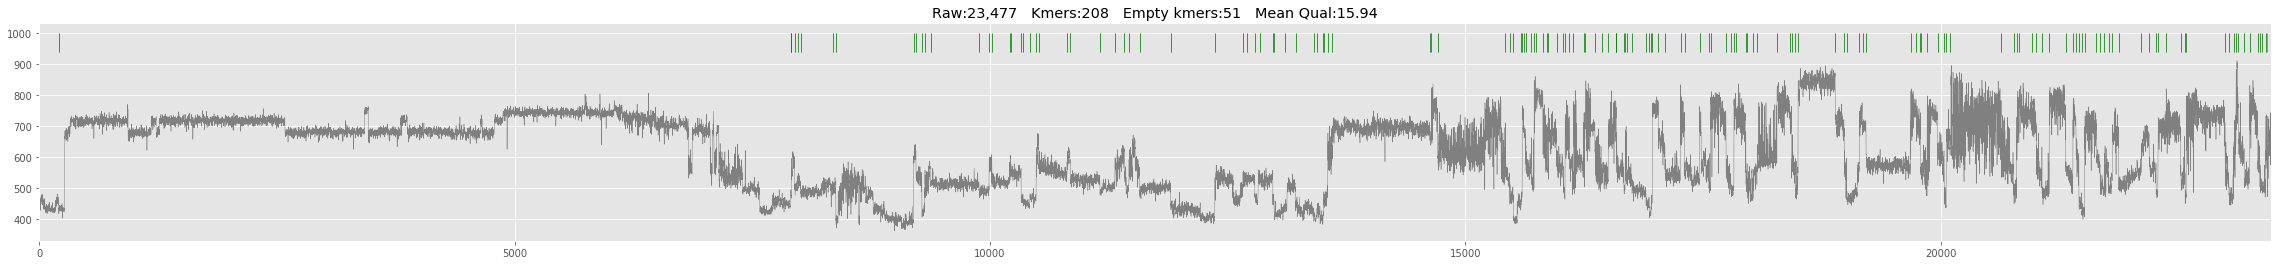

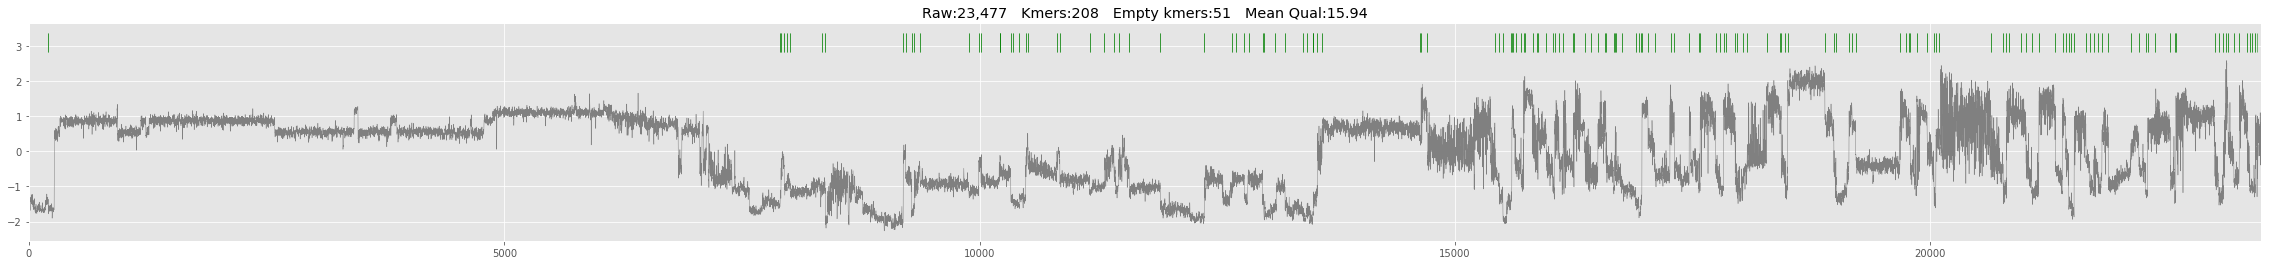

In [4]:
f = Fast5 (fast5_file="./data/0/RNA_control_03.fast5", zscore_norm=False)
fig = pl.figure(figsize=(40,4))
ax = f.plot_raw()

f = Fast5 (fast5_file="./data/0/RNA_control_03.fast5", zscore_norm=True)
fig = pl.figure(figsize=(40,4))
ax = f.plot_raw()

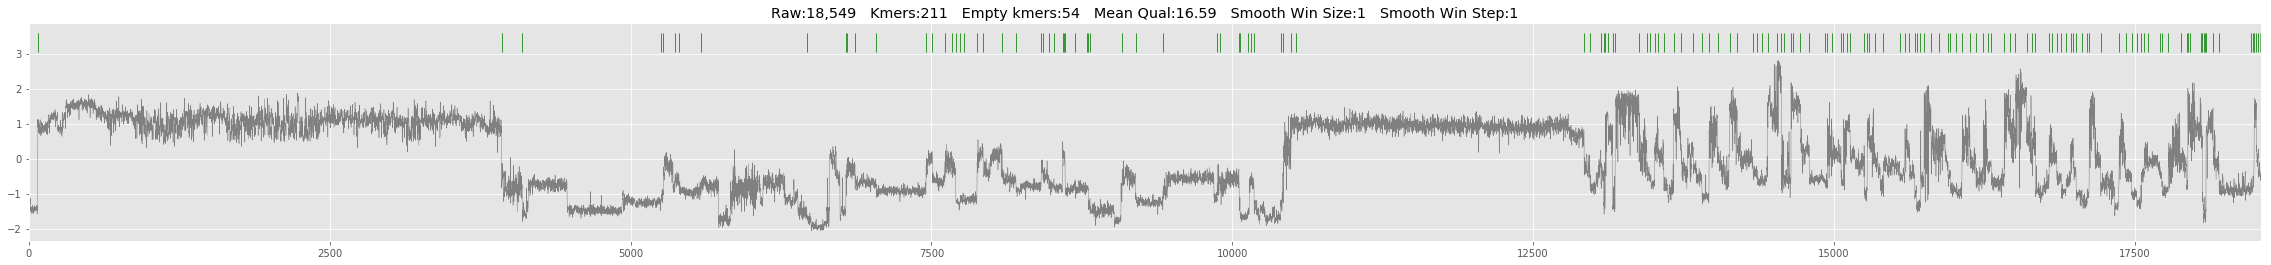

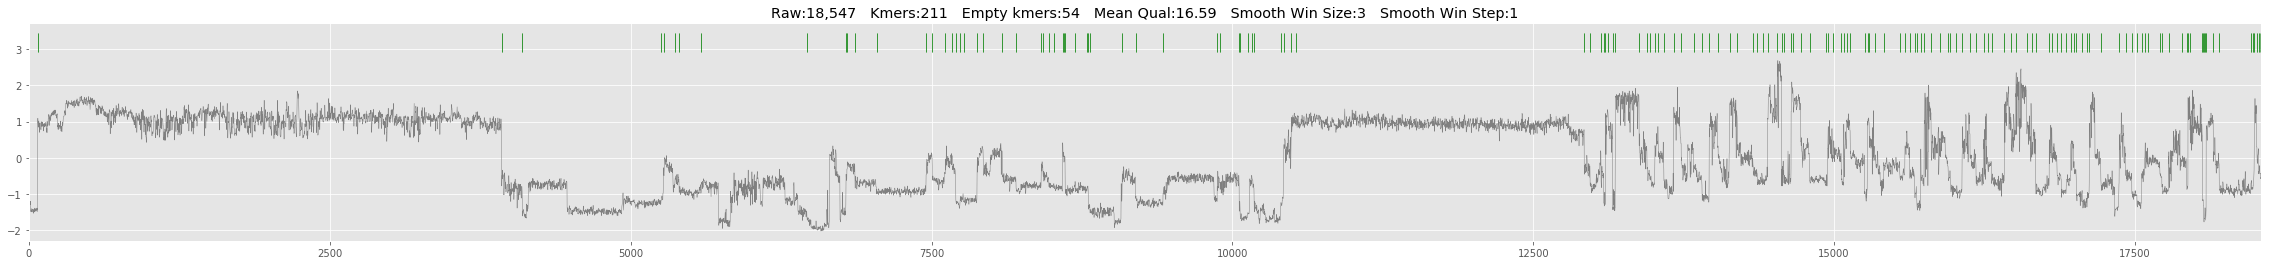

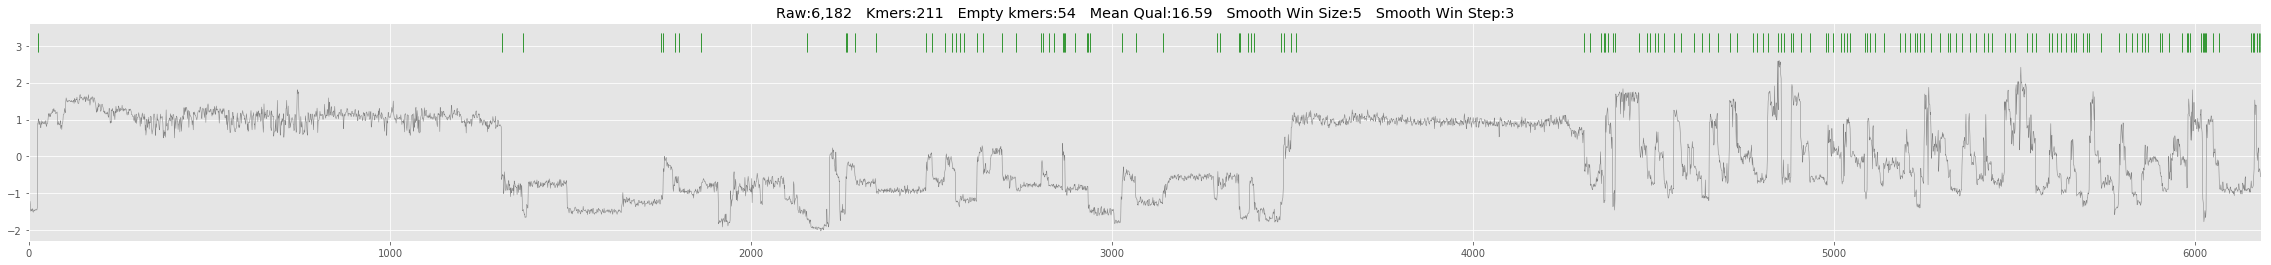

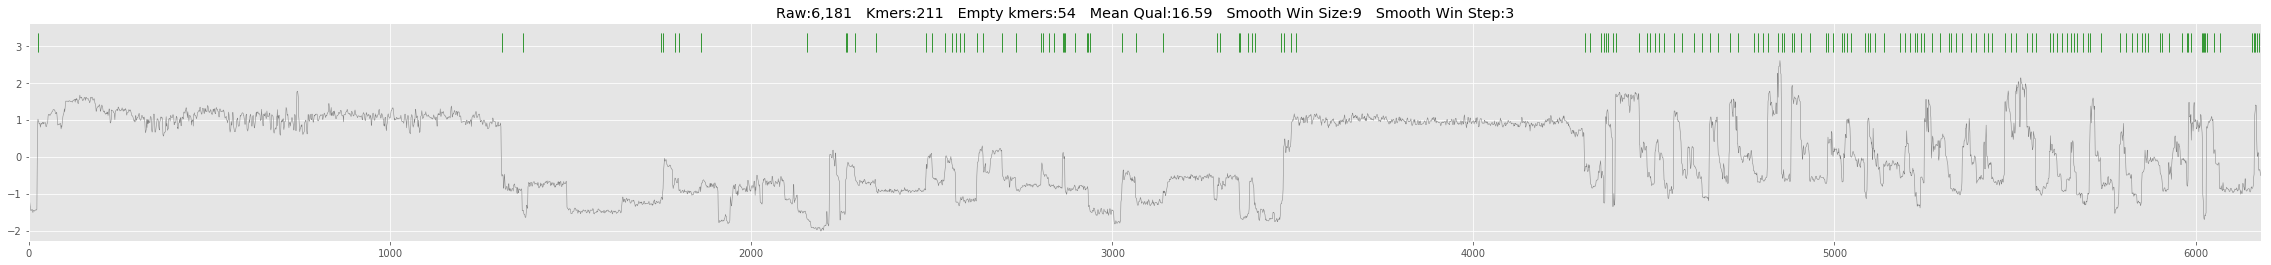

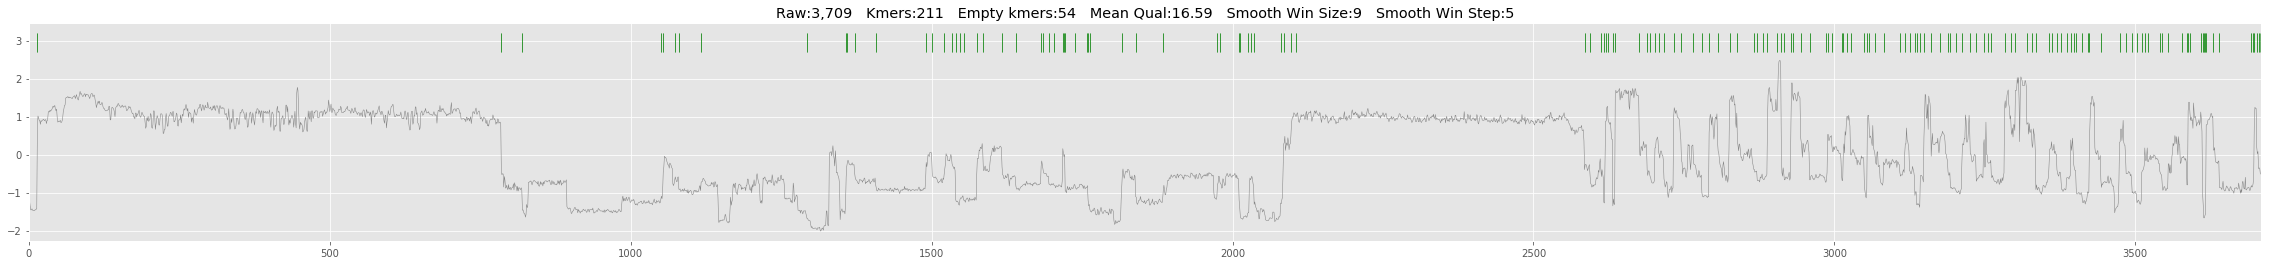

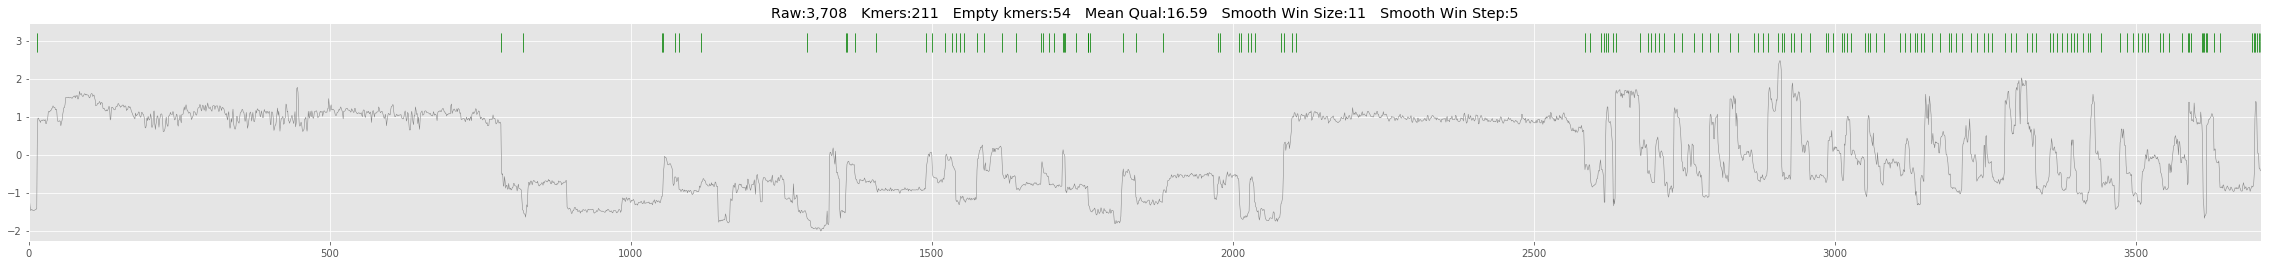

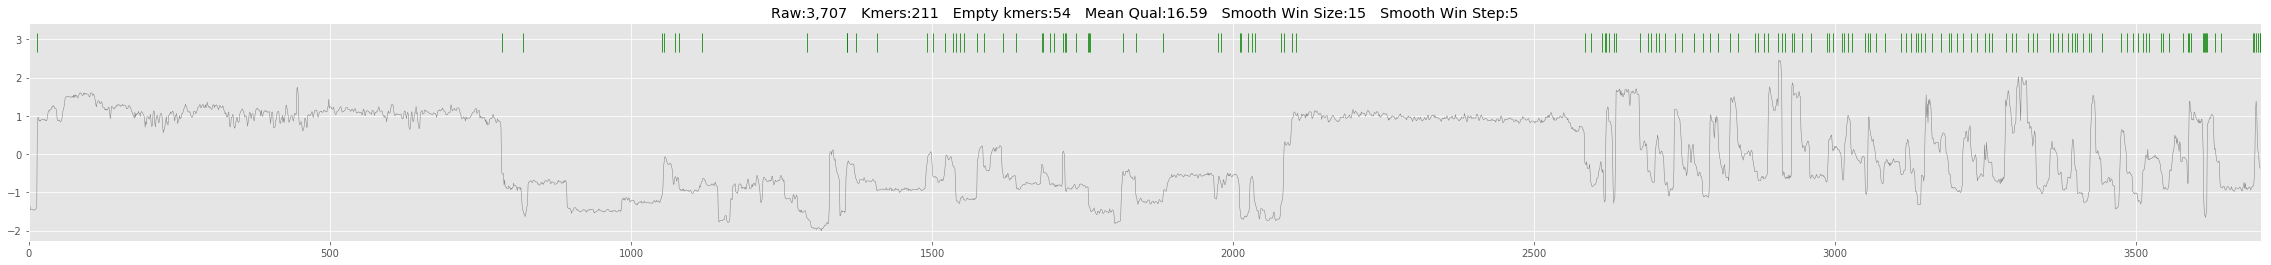

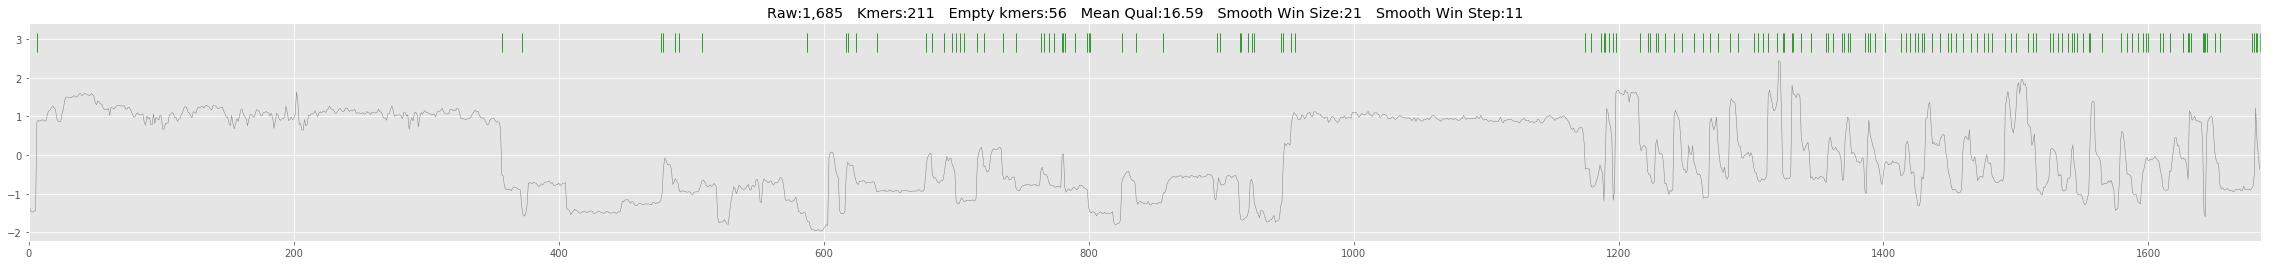

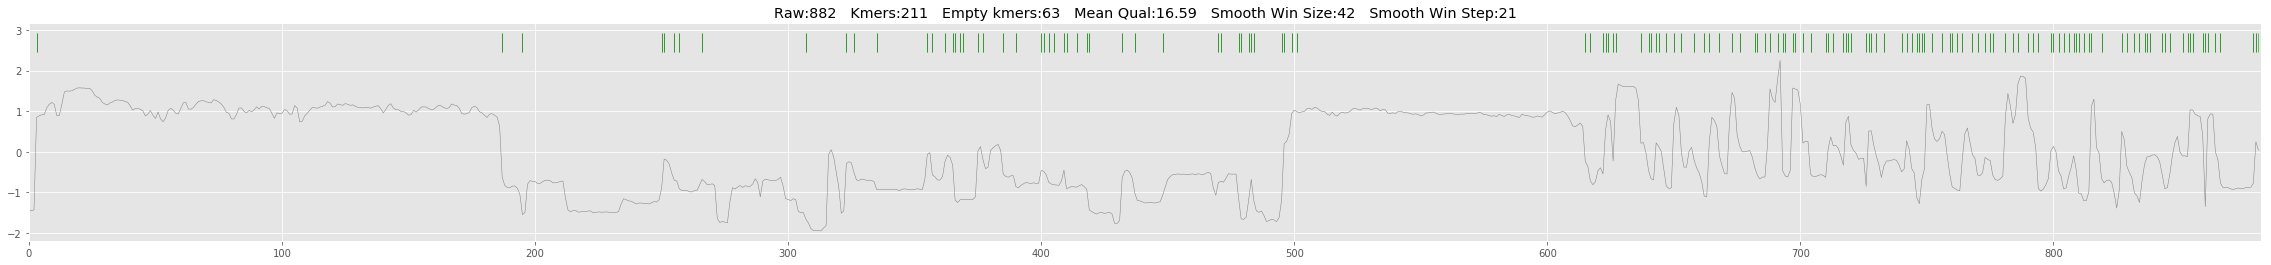

In [7]:
for win_size, win_step in [(1,1),(3,1),(5,3),(9,3),(9,5),(11,5),(15,5),(21,11),(42,21)]:
    f = Fast5 (fast5_file="./data/0/RNA_control_05.fast5", smooth_raw_signal=True, smoothing_win_size=win_size, smoothing_win_step=win_step, zscore_norm=True)
    fig = pl.figure(figsize=(40,4))
    ax = f.plot_raw()

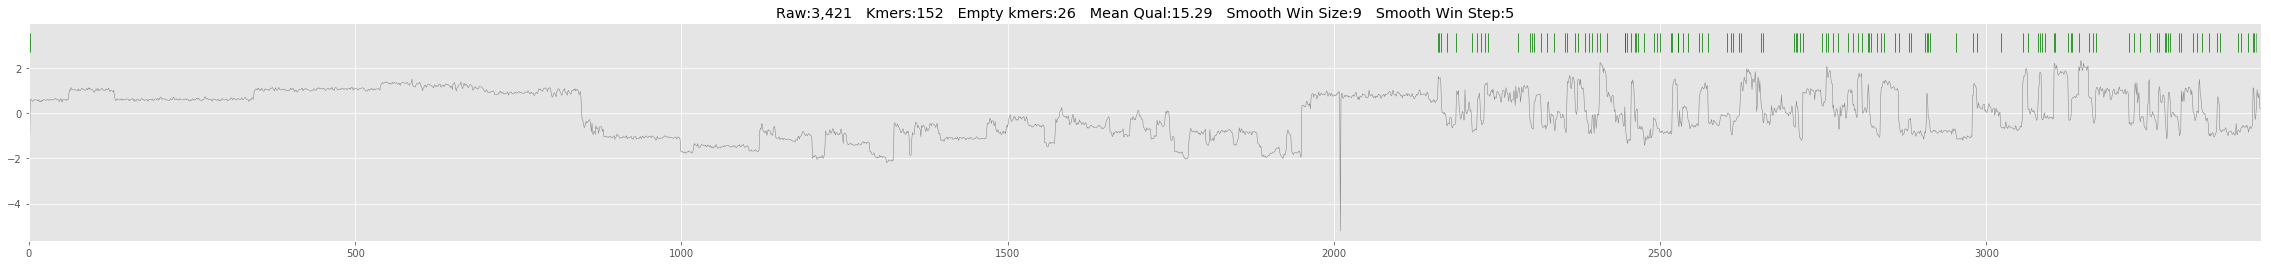

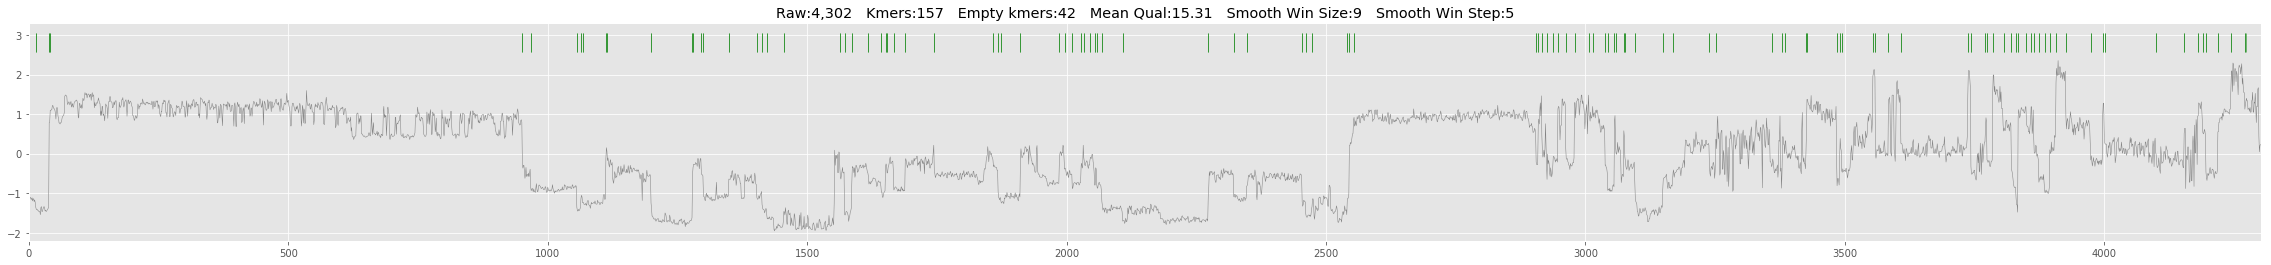

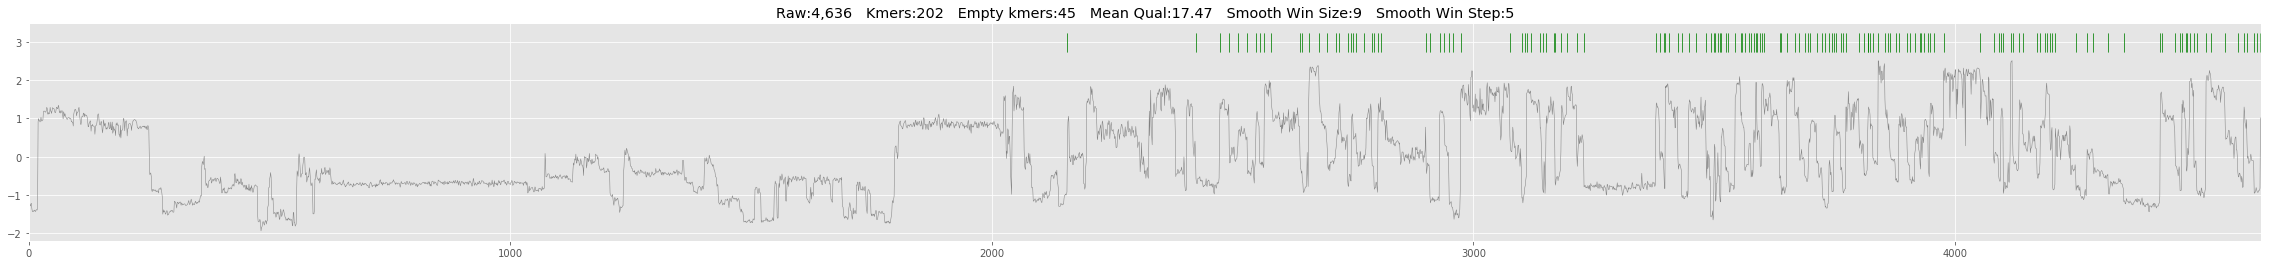

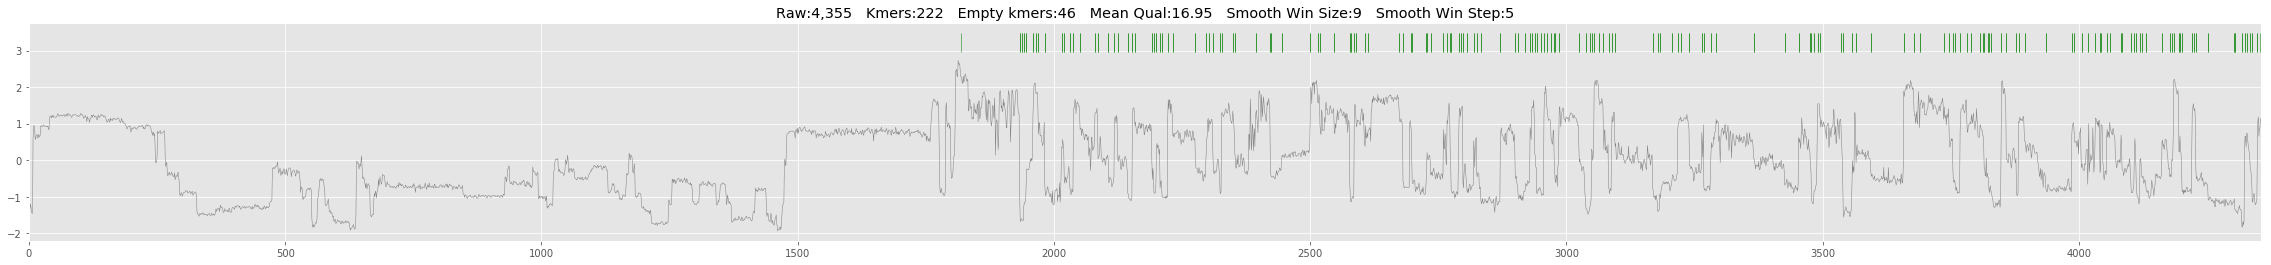

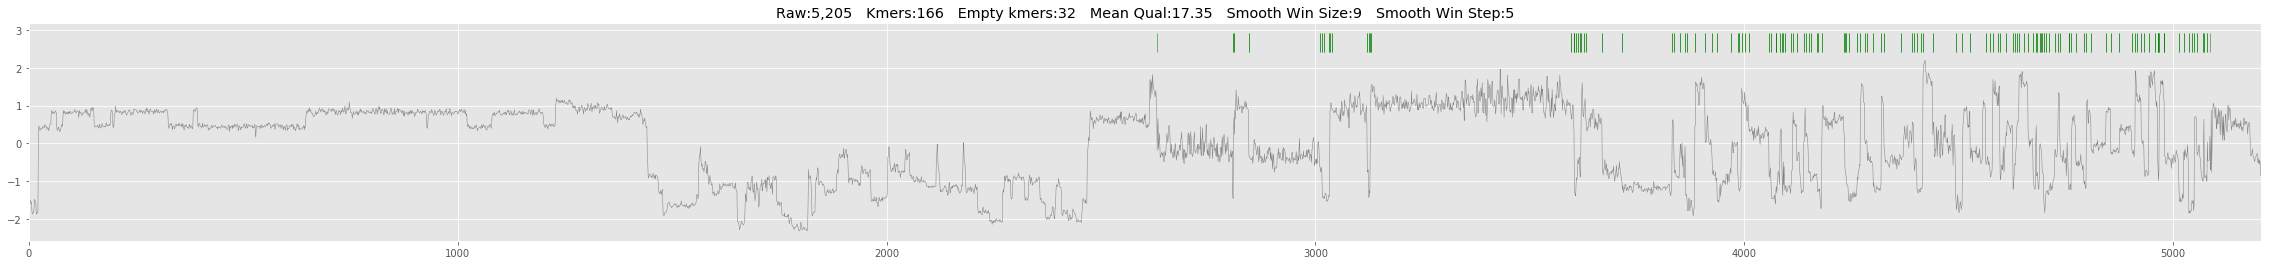

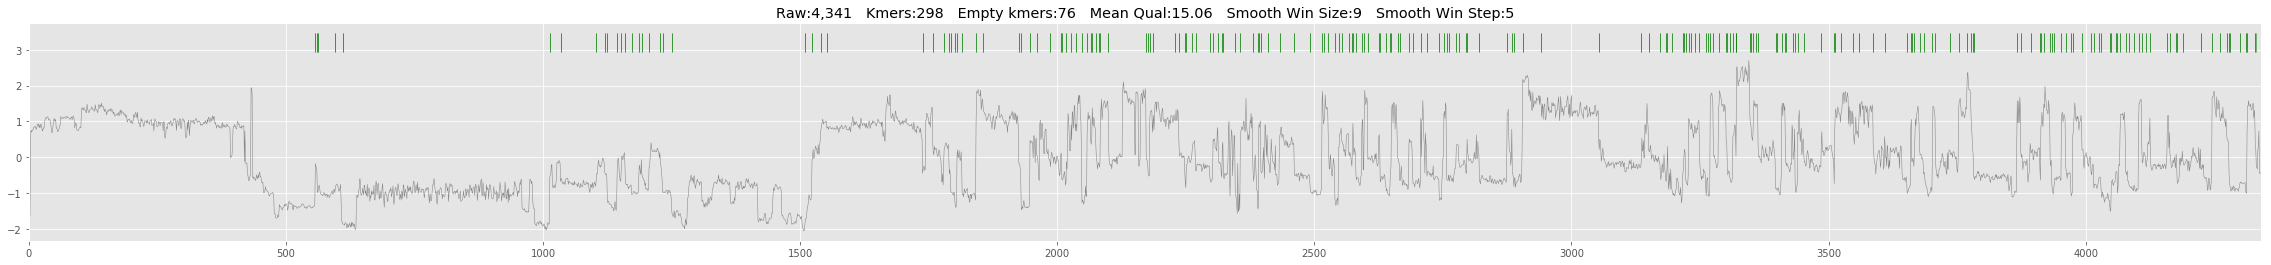

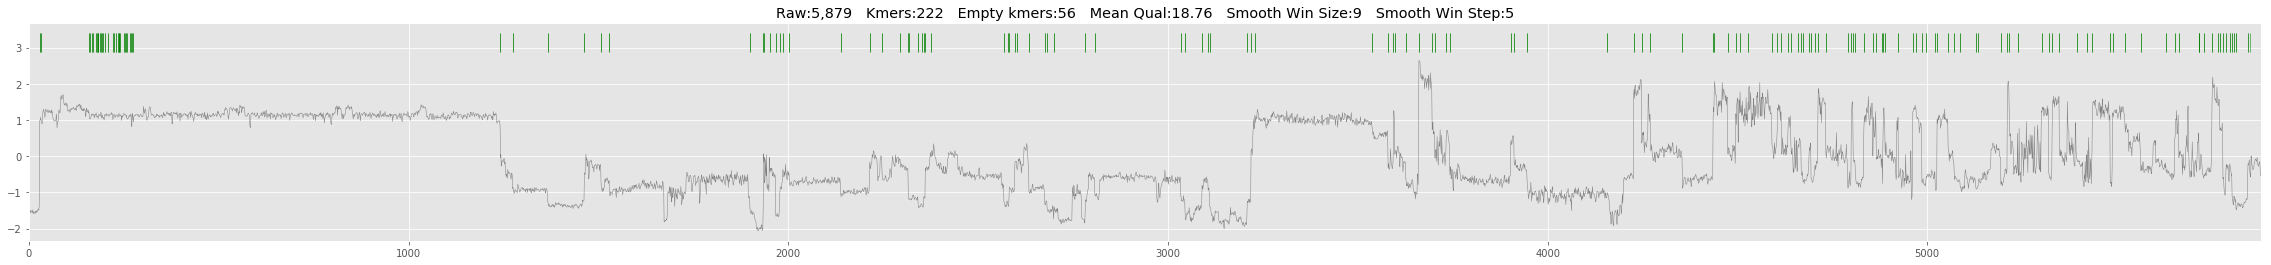

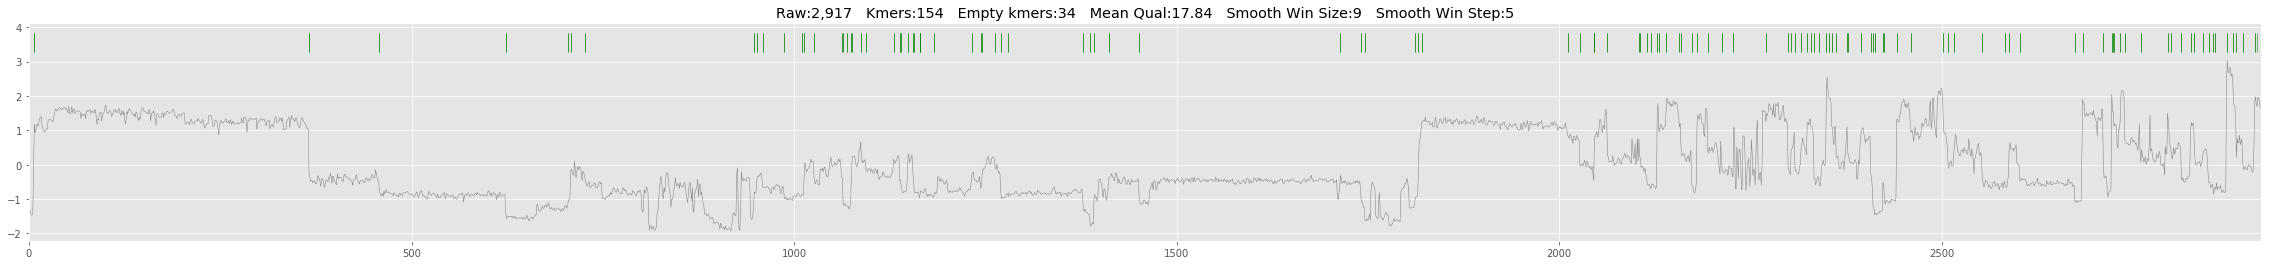

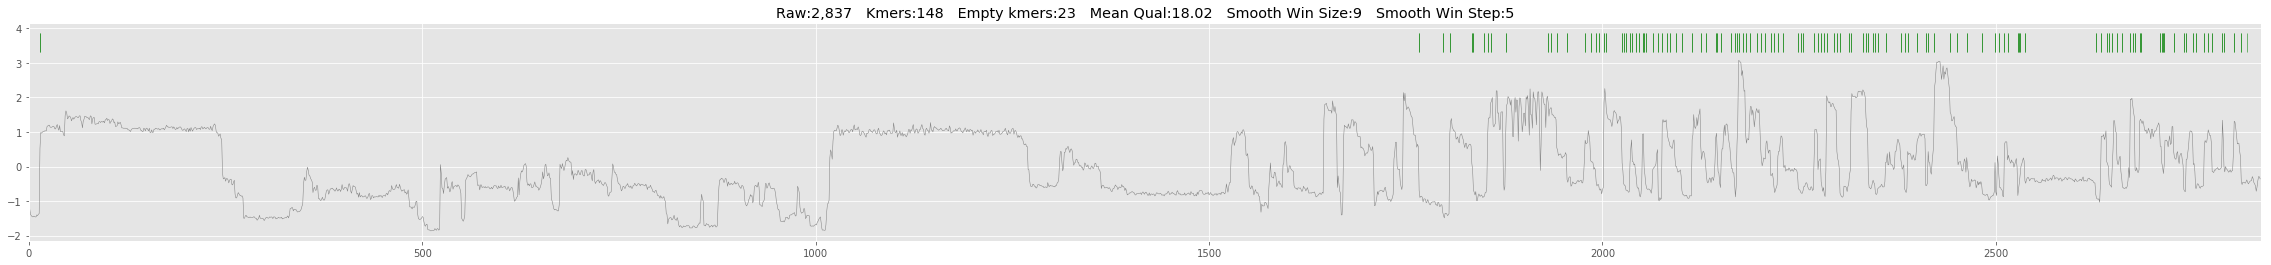

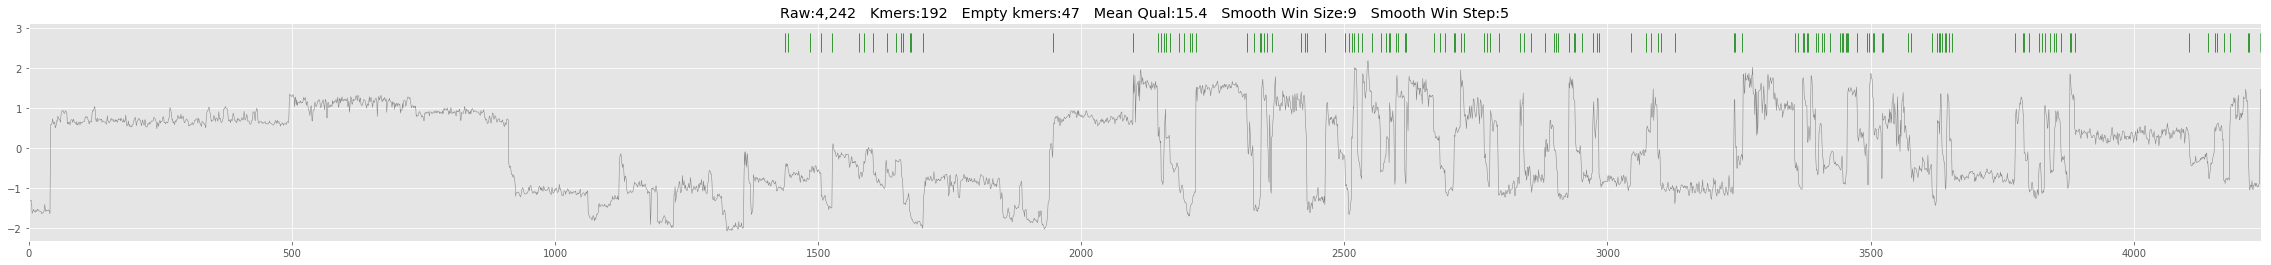

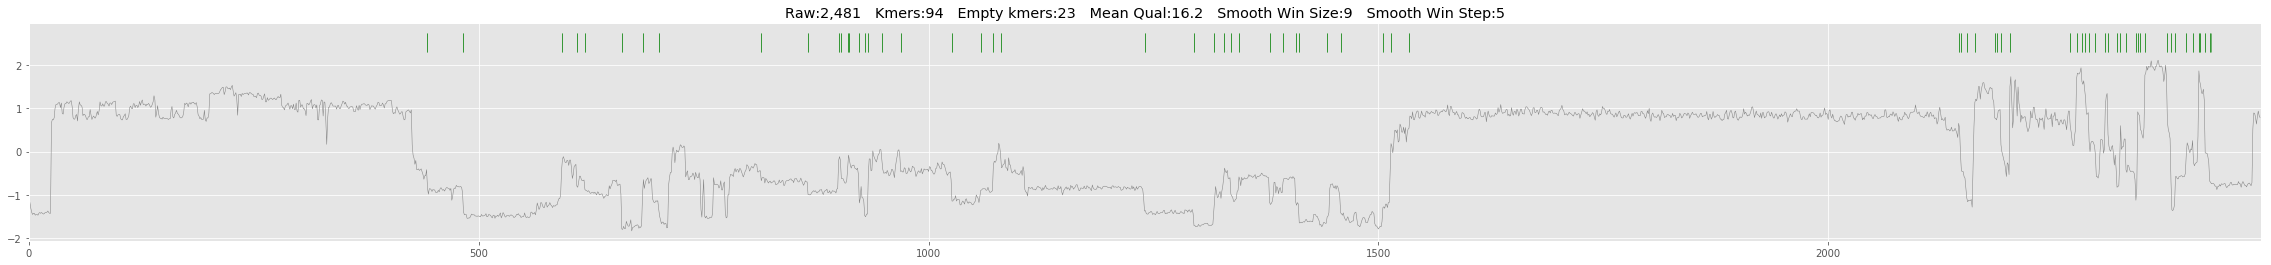

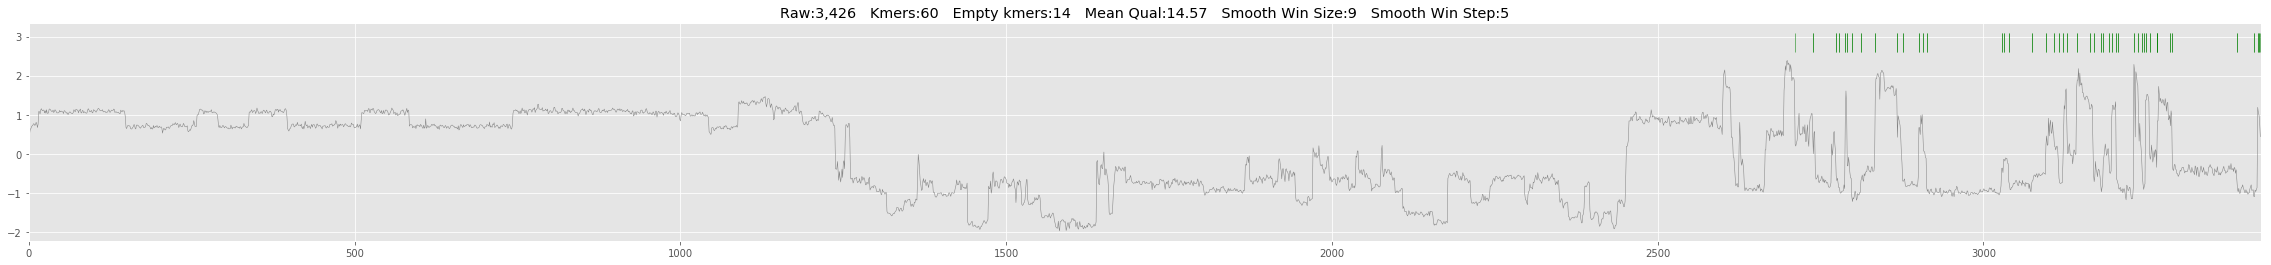

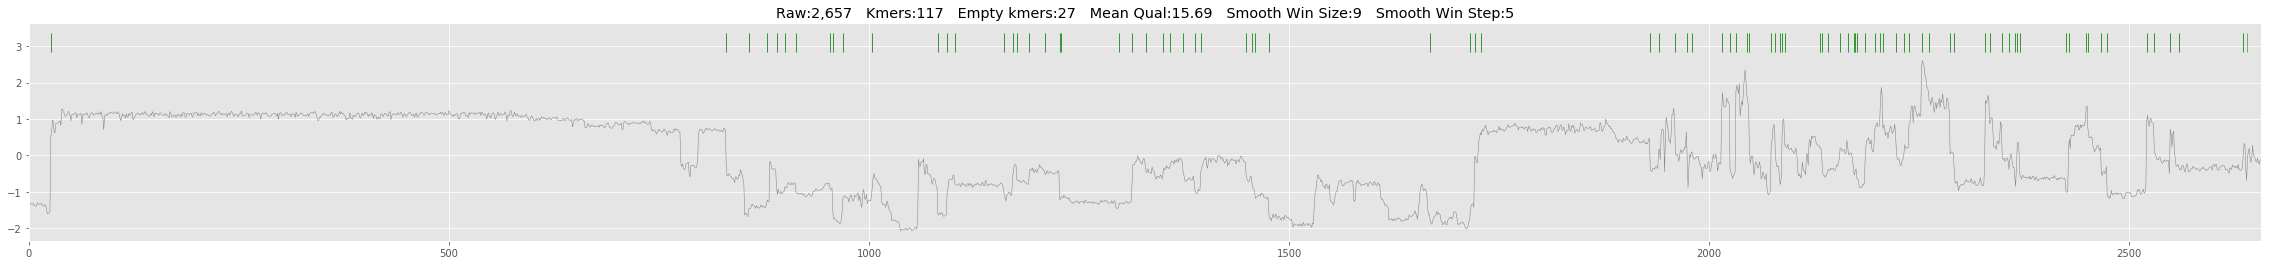

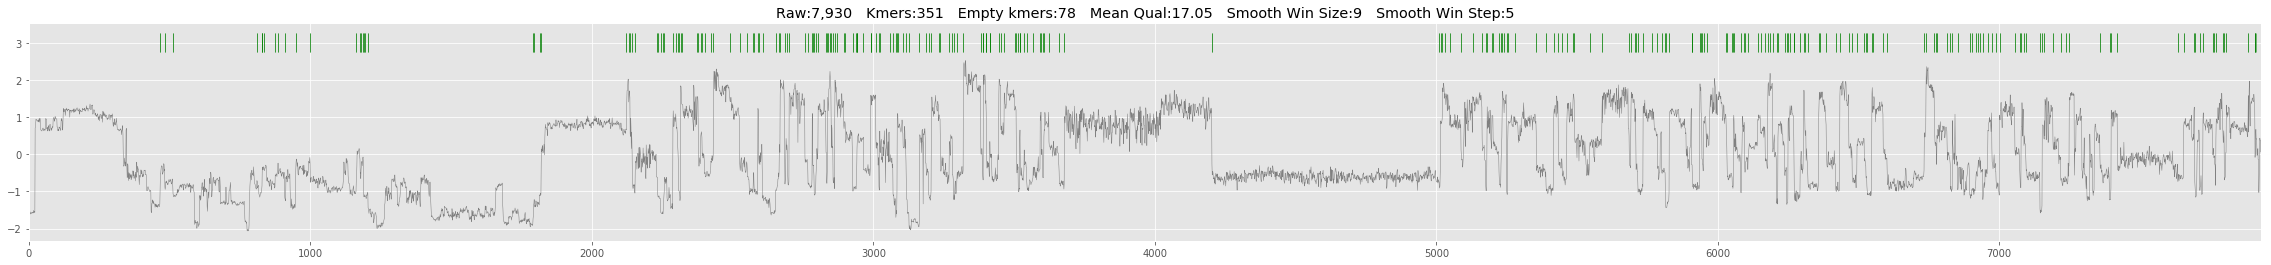

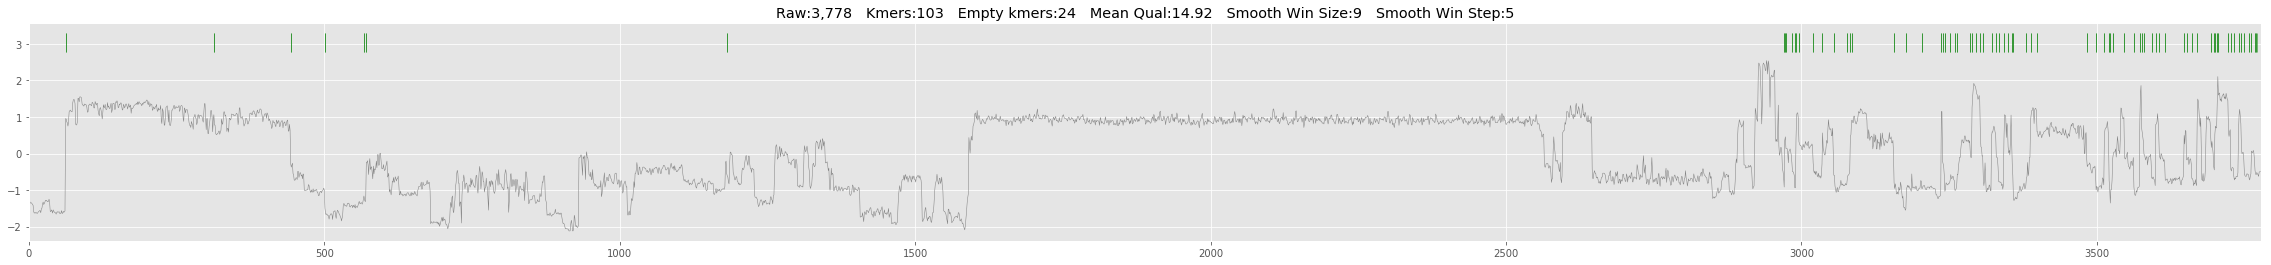

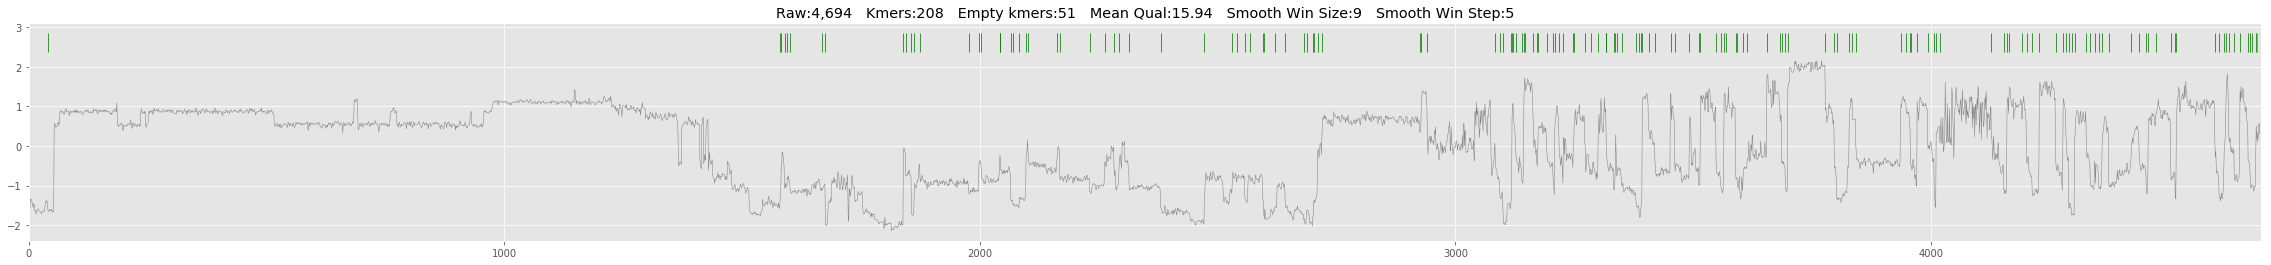

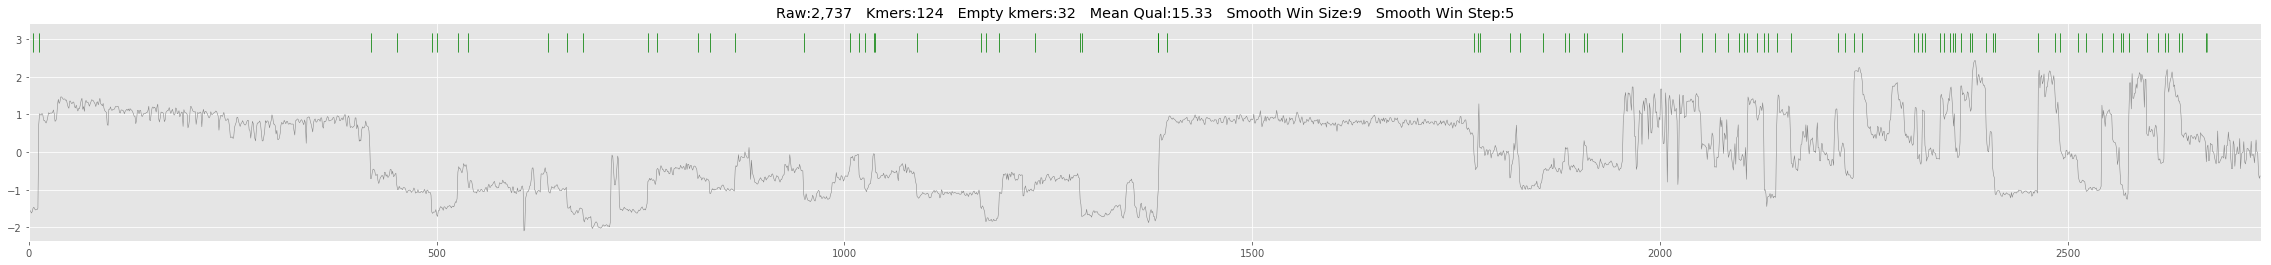

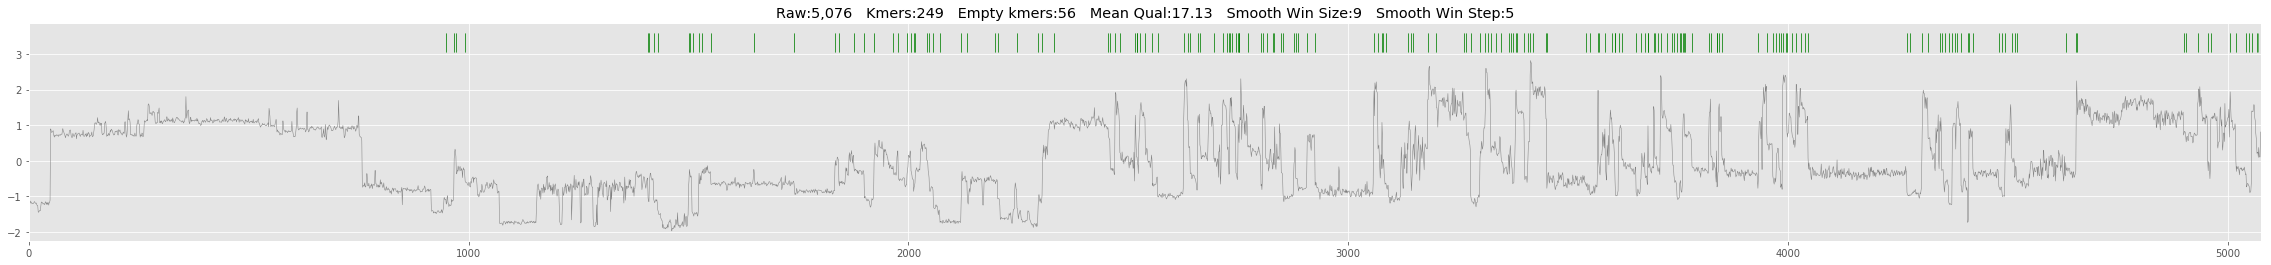

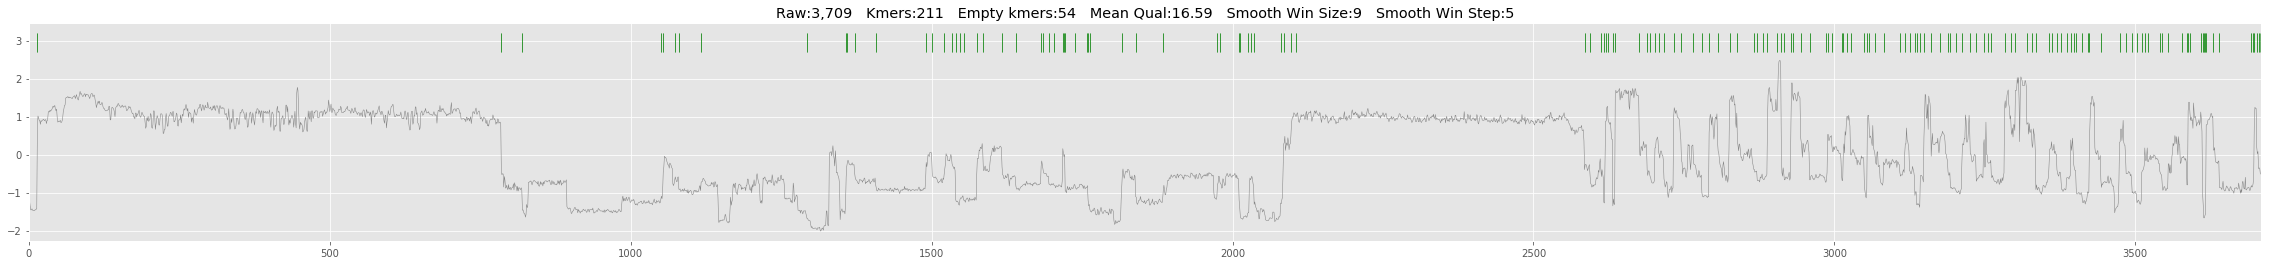

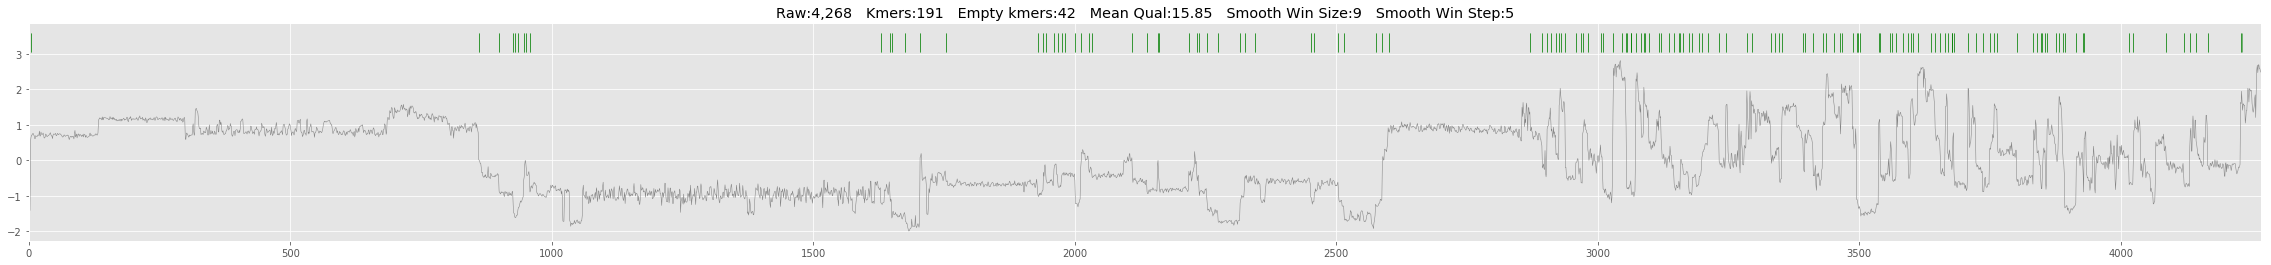

In [8]:
for fn in find_fast5_files_gen ("./data/"):
    try:
        f = Fast5 (fast5_file=fn, smooth_raw_signal=True, smoothing_win_size=9, smoothing_win_step=5, zscore_norm=True)
        fig = pl.figure(figsize=(40,4))
        ax = f.plot_raw()
    except AssertionError as E:
        print (E)

# Dev Fast5_parse

In [5]:
fast5_dir = "/home/aleg/Data/Datasets/"
output_db_file = "/home/aleg/Data/Datasets/Nanopore/read.db"

f = Fast5Parser (fast5_dir = fast5_dir, output_db_file = output_db_file, threads=8, verbose=True)
f ()

with shelve.open(output_db_file, flag = "r") as db:
    for id, b in itertools.islice(db.items(), 5):
        print (b)

Initialise Karystos
Parse Fast5 files and find blocks
Valid files:6,000 Invalid File:40,000          
Invalid fast5 files summary
	No Basecall Value:40,000
[Fast5] file:/home/aleg/Data/Datasets/Nanopore/fast5/dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170614_FNFAH04839_MN21747_sequencing_run_modRNA_r001e_20181_read_6369_ch_192_strand.fast5
	Read ID: 526b4be6-5dbb-4d83-8f60-4a7145db2006
	Count Raw signals: 12901
	[Basecall] Albacore_basecalling
		Sequence: AGUUUAGAGUGAAGAUUAUGUUGGC
		Quality: [ 8 10 30 13  7 19 13 13 15 13  8  6 13 16 19 12 16  6  8 11 16 10 10 11  5]
		Sequence length: 88	Empty kmers: 20	Mean quality: 12.380434782608695

[Fast5] file:/home/aleg/Data/Datasets/Nanopore/fast5/dhcp_10_248_138_212_eduroam_wireless_private_cam_ac_uk_20170614_FNFAH04839_MN21747_sequencing_run_modRNA_r001e_20181_read_5376_ch_372_strand.fast5
	Read ID: b25b6d28-9664-43ff-a00d-fa55abe6bff1
	Count Raw signals: 15073
	[Basecall] Albacore_basecalling
		Sequence: GCCAGGCCCCAGUGUCCCAGGC

In [4]:
fast5_dir = "./data/"
output_db_file = "./results/small.db"
f = Fast5Parser (fast5_dir = fast5_dir, output_db_file = output_db_file)
f ()

with shelve.open(output_db_file, flag = "r") as db:
    for id, b in db.items():
        print (b)

Valid files:20 Invalid File:0          
[Fast5] file:/home/aleg/Programming/Python3/Fast5Tools/tests/data/0/RNA_control_06.fast5
	Read ID: b186604d-2fa6-409f-982e-b1dc9312d7ed
	Count Raw signals: 13292

[Fast5] file:/home/aleg/Programming/Python3/Fast5Tools/tests/data/1/RNA_control_12.fast5
	Read ID: 0d2095b8-5c75-4f7f-b5f1-d1a652fd5719
	Count Raw signals: 29399

[Fast5] file:/home/aleg/Programming/Python3/Fast5Tools/tests/data/0/RNA_control_10.fast5
	Read ID: 4ba76b65-85fc-4580-90ca-3bdb00ed7179
	Count Raw signals: 39654

[Fast5] file:/home/aleg/Programming/Python3/Fast5Tools/tests/data/1/RNA_control_19.fast5
	Read ID: 6a551ec6-5a97-4897-a843-58263b90343a
	Count Raw signals: 17113

[Fast5] file:/home/aleg/Programming/Python3/Fast5Tools/tests/data/1/RNA_control_14.fast5
	Read ID: 6ed1f803-9394-427b-98b7-81e5e4ee2085
	Count Raw signals: 21515

[Fast5] file:/home/aleg/Programming/Python3/Fast5Tools/tests/data/1/RNA_control_16.fast5
	Read ID: 23c1730b-784c-4fc0-bf36-e7d97b7aeb8c
	Count Ra